In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_rows = 500

data = {
    'Income': np.random.randint(20000, 100000, n_rows).astype(float),
    'Kidhome': np.random.randint(0, 3, n_rows),
    'Teenhome': np.random.randint(0, 3, n_rows),
    'Recency': np.random.randint(0, 100, n_rows),
    'MntWines': np.random.randint(0, 1500, n_rows),
    'MntFruits': np.random.randint(0, 200, n_rows),
    'MntMeatProducts': np.random.randint(0, 1000, n_rows),
    'MntFishProducts': np.random.randint(0, 250, n_rows),
    'MntSweetProducts': np.random.randint(0, 250, n_rows),
    'MntGoldProds': np.random.randint(0, 250, n_rows),
    'NumDealsPurchases': np.random.randint(0, 15, n_rows),
    'NumWebPurchases': np.random.randint(0, 15, n_rows),
    'NumCatalogPurchases': np.random.randint(0, 15, n_rows),
    'NumStorePurchases': np.random.randint(0, 15, n_rows),
    'NumWebVisitsMonth': np.random.randint(0, 20, n_rows),
    'AcceptedCmp3': np.random.randint(0, 2, n_rows),
    'AcceptedCmp4': np.random.randint(0, 2, n_rows),
    'AcceptedCmp5': np.random.randint(0, 2, n_rows),
    'AcceptedCmp1': np.random.randint(0, 2, n_rows),
    'AcceptedCmp2': np.random.randint(0, 2, n_rows),
    'Complain': np.random.randint(0, 2, n_rows),
    'Z_CostContact': [3] * n_rows,
    'Z_Revenue': [11] * n_rows,
    'Response': np.random.randint(0, 2, n_rows),
    'Age': np.random.randint(18, 80, n_rows),
    'Customer_Days': np.random.randint(1, 3000, n_rows),
    'marital_Divorced': np.random.randint(0, 2, n_rows),
    'marital_Married': np.random.randint(0, 2, n_rows),
    'marital_Single': np.random.randint(0, 2, n_rows),
    'marital_Together': np.random.randint(0, 2, n_rows),
    'marital_Widow': np.random.randint(0, 2, n_rows),
    'education_2n Cycle': np.random.randint(0, 2, n_rows),
    'education_Basic': np.random.randint(0, 2, n_rows),
    'education_Graduation': np.random.randint(0, 2, n_rows),
    'education_Master': np.random.randint(0, 2, n_rows),
    'education_PhD': np.random.randint(0, 2, n_rows),
}


marketing_df = pd.DataFrame(data)

marketing_df['MntTotal'] = marketing_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
marketing_df['MntRegularProds'] = marketing_df['MntTotal'] - marketing_df['MntGoldProds']
marketing_df['AcceptedCmpOverall'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

marketing_df.to_csv('Dataset.csv', index=False)

print(" Dataset 'Dataset.csv' created with 39 columns!")
marketing_df.head()

✅ Dataset 'Dataset.csv' created with 39 columns!


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,35795.0,0,0,56,99,133,370,55,205,107,...,0,0,1,0,1,1,1,969,862,3
1,20860.0,2,1,15,751,159,856,176,127,114,...,1,1,1,1,0,1,1,2183,2069,2
2,96820.0,0,0,55,477,92,852,140,3,28,...,0,0,1,0,0,1,0,1592,1564,4
3,74886.0,0,2,9,1321,42,383,188,157,58,...,0,1,0,0,0,0,1,2149,2091,3
4,26265.0,1,2,29,939,129,907,229,222,124,...,1,0,0,1,0,1,1,2550,2426,2


✅ Dataset.csv loaded successfully!

📊 CATEGORY SPENDING PER CLUSTER (DATA TABLE)


,Income,Age,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,,,,
0,54264.03,62.42,2286.07,1113.84,105.68,677.34,128.81,131.46,128.95
1,71697.74,64.50,1340.44,491.10,99.86,410.66,110.28,112.69,115.84
2,79112.26,33.00,1935.17,875.80,105.75,563.72,128.33,129.05,132.51
3,34923.39,40.41,1605.95,671.67,99.98,466.73,125.12,123.41,119.02


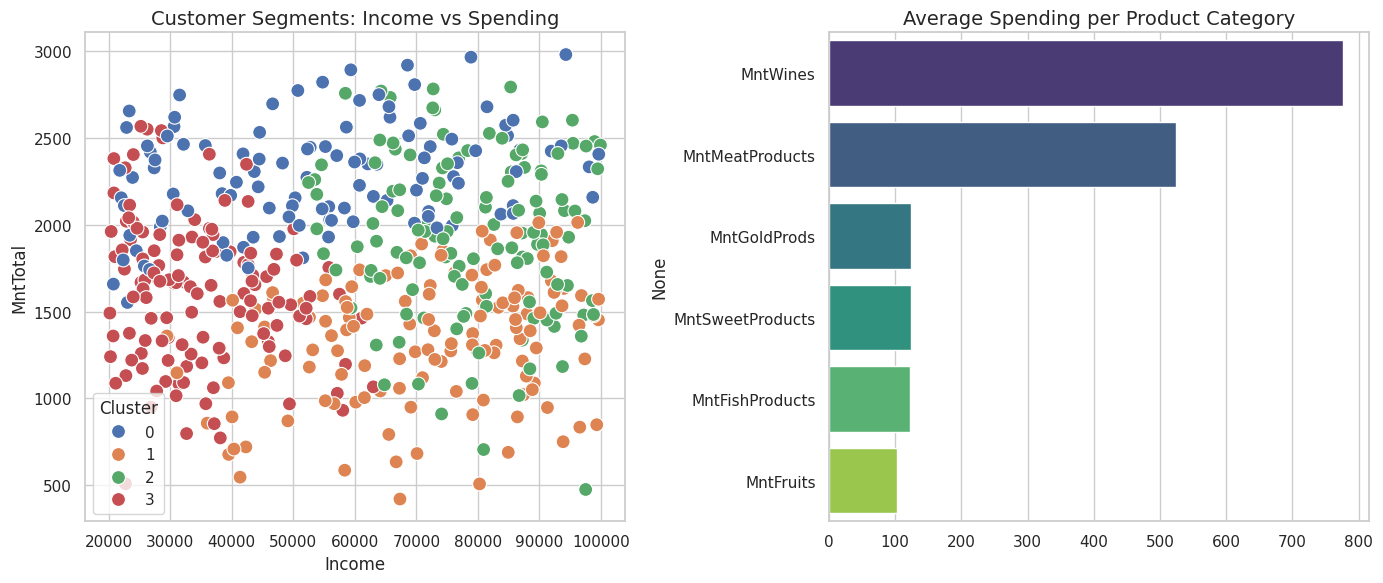


✅ Project 2 Analysis with Dataset.csv is Complete!


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

try:
    
    df = pd.read_csv('Dataset.csv')
    print(" Dataset.csv loaded successfully!")

    df.columns = df.columns.str.strip()

except FileNotFoundError:
    print("Error: 'Dataset.csv' not found. Please upload the file to the Colab sidebar.")

mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

if 'MntTotal' not in df.columns:
    df['MntTotal'] = df[mnt_cols].sum(axis=1)

if 'In_relationship' not in df.columns:
    if 'marital_Married' in df.columns and 'marital_Together' in df.columns:
        df['In_relationship'] = ((df['marital_Married'] == 1) | (df['marital_Together'] == 1)).astype(int)
    else:
        df['In_relationship'] = 0 

features = ['Income', 'MntTotal', 'Age']
X_scaled = StandardScaler().fit_transform(df[features])

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\n" + "="*60)
print(" CATEGORY SPENDING PER CLUSTER (DATA TABLE)")
print("="*60)
report_cols = ['Income', 'Age', 'MntTotal'] + mnt_cols
display(df.groupby('Cluster')[report_cols].mean().round(2))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='deep', s=100, edgecolor='w')
plt.title('Customer Segments: Income vs Spending', fontsize=14)


plt.subplot(1, 2, 2)
avg_mnt = df[mnt_cols].mean().sort_values(ascending=False)
sns.barplot(x=avg_mnt.values, y=avg_mnt.index, palette='viridis')
plt.title('Average Spending per Product Category', fontsize=14)

plt.tight_layout()
plt.show()
